# 測定データの解析-フィッティングの覚書-

In [58]:
import tkinter
from tkinter import filedialog
import pandas as pd

root = tkinter.Tk()
root.withdraw()
path = filedialog.askopenfilename(
    title="file___",
    filetypes=[("txt","txt"),("csv","csv")])
if path:
    df = pd.read_csv(path,engine="python",header=None,sep=';',skiprows=3)

In [223]:
df.head()

,1,mag,fit
freq[GHz],,,
3.609800,-49.251881,0.821171,0.763226
3.609805,-50.187088,0.662084,0.763276
3.609810,-49.289032,0.814176,0.763325
3.609815,-49.213296,0.828499,0.763374
3.609820,-49.066380,0.857006,0.763424


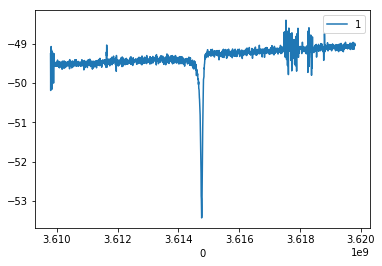

In [183]:
if path:
    df = pd.read_csv(path,engine="python",header=None,sep=';',skiprows=3)
import matplotlib.pyplot as plt
df=df.iloc[:,[0,1]]
df.set_index(0,inplace=True)#インデックスを指定してdfを上書き
df.plot()
plt.show()

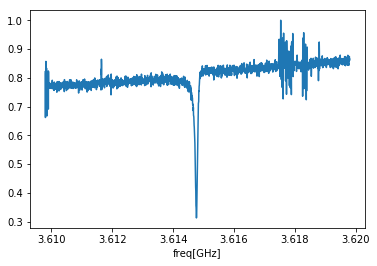

In [184]:
df.index = df.index*pow(10,-9)
df.index.rename('freq[GHz]',inplace=True)
df['mag'] = pow(10,(df.iloc[:]-df.iloc[:].max())/10)
df['mag'].plot()
plt.show()

### フィッティングに用いる関数
・ローレンツ関数

$$f_{\left(x\right)}=A \left(\frac{\gamma}{\left(x-\mu\right)^2+\gamma^2}\right)+Bx+C$$


In [191]:
import scipy.optimize
def lorentz(x,A,mu,gamma,B,C):#フィットする関数を定義
    return A*x*gamma/((x-mu)**2+gamma**2)+B*x+C
A  = -np.pi*(df.index.max()-df.index.min())/20
mu = df.index.values.mean()
gamma  = (df.index.max()-df.index.min())/20
B  = 10
C  = 0
init = [A,mu,gamma,B,C]#フィットしたいパラメータの初期値
opt, cov = scipy.optimize.curve_fit(lorentz,df.index,df['mag'],init)#フィッティング

In [194]:
print(opt)

[-6.05947105e-06  3.61475875e+00  4.44171953e-05  9.89822762e+00
 -3.49673564e+01]


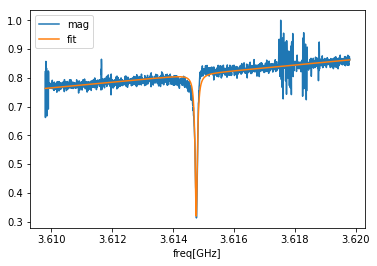

In [222]:
df['fit']=lorentz(df.index,opt[0],opt[1],opt[2],opt[3],opt[4])
df.loc[:,['mag','fit']].plot()
plt.show()

In [188]:
import numpy as np
from lmfit import Model, Parameters, Parameter
def lorentz(x,A,mu,gamma,B,C):
    return A*x*gamma/((x-mu)**2+gamma**2)+B*x+C
mod = Model(lorentz)
par = Parameters()
par['A']=Parameter(value=np.pi*df['mag'].max()*(df.index.max()-df.index.min())/20,vary=True)
par['mu']=Parameter(value=df.index.values.mean(),vary=True)
par['gamma']=Parameter(value=(df.index.max()-df.index.min())/20,vary=True)
par['B']=Parameter(value=10,vary=True)
par['C']=Parameter(value=0,vary=True)

par['fwhm']=Parameter(name='fwhm',expr='2*gamma',vary=False)
par['Q']=Parameter(name='Q',expr='mu/fwhm',vary=False)
result = mod.fit(df['mag'],par,x=df.index)

In [189]:
result

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

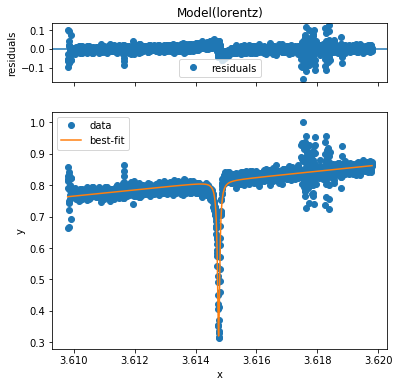

In [101]:
fit.plot()

In [93]:
result[0]

name,value,initial value,min,max,vary,expression
a,0.00157080,0.001570796326794863,-inf,inf,True,
mu,3.61480000,3.6148000000000002,-inf,inf,True,
g,5.0000e-04,0.0004999999999999894,-inf,inf,True,
b,0.10000000,0.1,-inf,inf,True,
c,1.00000000,1,-inf,inf,True,
fwhm,1.0000e-03,None,-inf,inf,False,2*g
Q,3614.80000,None,-inf,inf,False,mu/fwhm


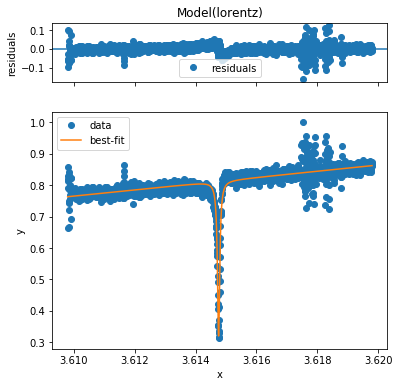

In [94]:
result[1].plot()
plt.show()